# NodeBB ML Model Integration

In [43]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from predict import predict

In [2]:
df = pd.read_csv('student_data.csv')

## Feature Distributions

### By gender

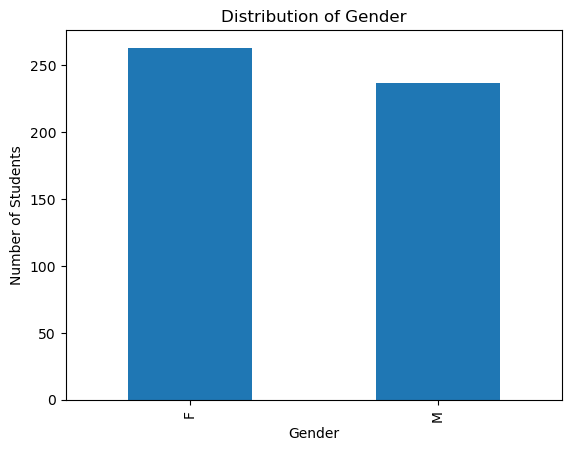

In [3]:
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar')
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.show()

### By age

21    140
20    111
22     99
19     55
23     51
18     24
24     16
25      4
Name: Age, dtype: int64


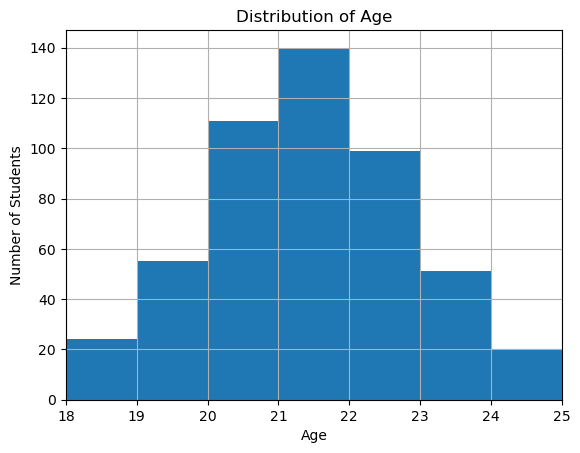

In [12]:
# Plot the histogram of the "Age" column
df["Age"].hist(bins=7)
plt.title("Distribution of Age")
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.xlim(18,25)

# Show the plot
plt.show()

### By major

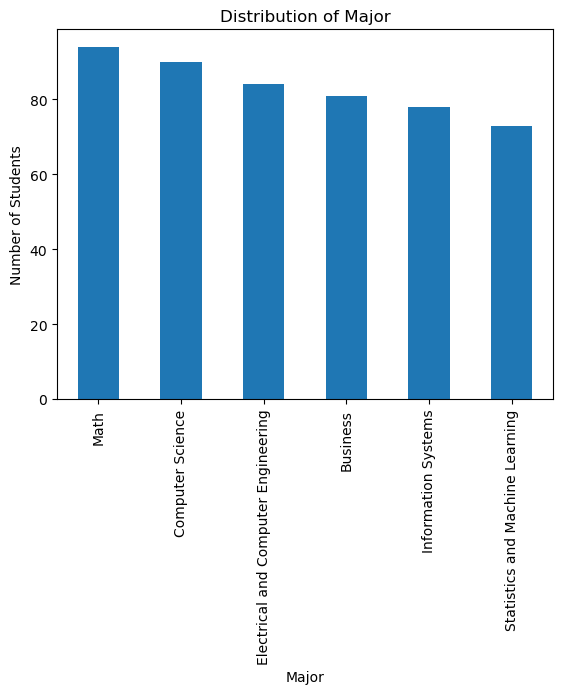

In [10]:
major_counts = df['Major'].value_counts()
major_counts.plot(kind='bar')
plt.title("Distribution of Major")
plt.xlabel("Major")
plt.ylabel("Number of Students")
plt.show()

### By GPA 

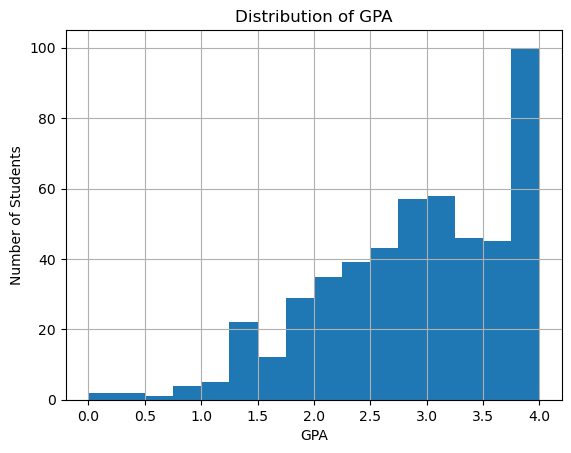

In [8]:
column_name = 'GPA'
df[column_name].hist(bins=16)
plt.title("Distribution of " + column_name)
plt.xlabel(column_name)
plt.ylabel('Number of Students')

# Show the plot
plt.show()

### By extracurricular activities

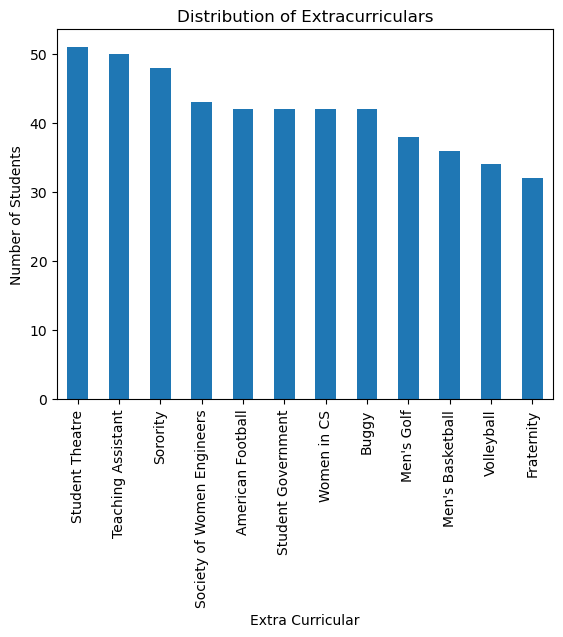

In [11]:
ec_counts = df['Extra Curricular'].value_counts()
ec_counts.plot(kind='bar')
plt.title("Distribution of Extracurriculars")
plt.xlabel("Extra Curricular")
plt.ylabel("Number of Students")
plt.show()

### By number of programming languages

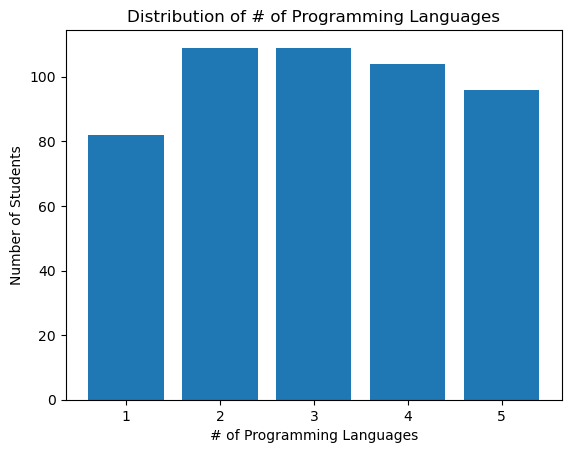

In [30]:
programming_lang_counts = df['Num Programming Languages'].value_counts()
programming_lang_counts = programming_lang_counts.sort_index()

plt.title("Distribution of # of Programming Languages")
plt.bar(programming_lang_counts.index, programming_lang_counts.values)
plt.xlabel('# of Programming Languages')
plt.ylabel('Number of Students')

plt.show()

### By number of past internships

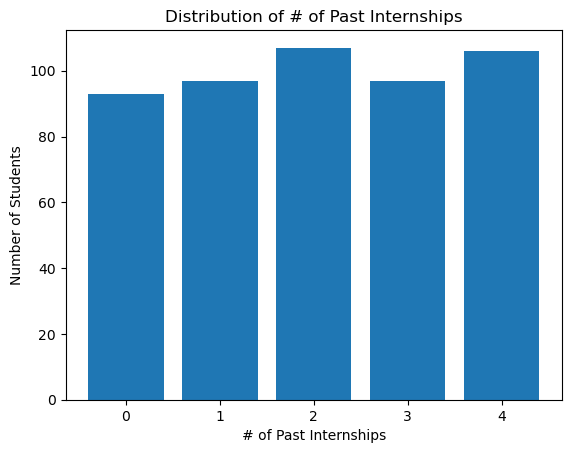

In [32]:
internship_counts = df['Num Past Internships'].value_counts()
internship_counts = internship_counts.sort_index()

plt.title("Distribution of # of Past Internships")
plt.bar(internship_counts.index, internship_counts.values)
plt.xlabel('# of Past Internships')
plt.ylabel('Number of Students')

plt.show()

## Model Predictions on the Dataset

In [33]:
predictions = df.apply(predict, axis=1)

# Print the predictions
print(predictions)

0      {'good_employee': 0}
1      {'good_employee': 1}
2      {'good_employee': 0}
3      {'good_employee': 1}
4      {'good_employee': 0}
               ...         
495    {'good_employee': 0}
496    {'good_employee': 1}
497    {'good_employee': 0}
498    {'good_employee': 1}
499    {'good_employee': 0}
Length: 500, dtype: object


### Accuracy of the model

In [42]:
predicted_values = predictions.map(lambda x: x['good_employee'])
correct_predictions = (predicted_values == df['Good Candidate']).sum()
total_predictions = len(predictions)

accuracy = correct_predictions / total_predictions

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


### Confusion Matrix

In [45]:
actual_labels = df['Good Candidate']
predicted_labels = predictions.apply(lambda x: x['good_employee'])

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(actual_labels, predicted_labels).ravel()

# Print the confusion matrix
print('Confusion Matrix:')
print('------------------')
print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(f'True Positives: {tp}')

Confusion Matrix:
------------------
True Negatives: 221
False Positives: 42
False Negatives: 42
True Positives: 195
